# Análisis de datos de vuelos

### 1. Importamos las librerías

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
sns.set()

### 2. Importamos los datos

In [3]:
data = pd.read_excel('Vuelos_vs_productividad.xlsx', index_col= None,
              dtype={'Año': int, 'Mes': int, 'Productividad': float, 'Vuelos': int,})

In [4]:
data

,Año,Mes,Productividad,Vuelos
0,2011,1,10.798450,3870
1,2011,2,10.280838,3721
2,2011,3,9.828833,4481
3,2011,4,9.937158,4408
4,2011,5,10.054955,4501
...,...,...,...,...
103,2019,8,10.047148,5970
104,2019,9,10.033448,5680
105,2019,10,10.285494,5518
106,2019,11,9.868913,5698


In [36]:
data_1= data[['Productividad','Vuelos']]
data_1.head()

,Productividad,Vuelos
0,10.798450,3870
1,10.280838,3721
2,9.828833,4481
3,9.937158,4408
4,10.054955,4501


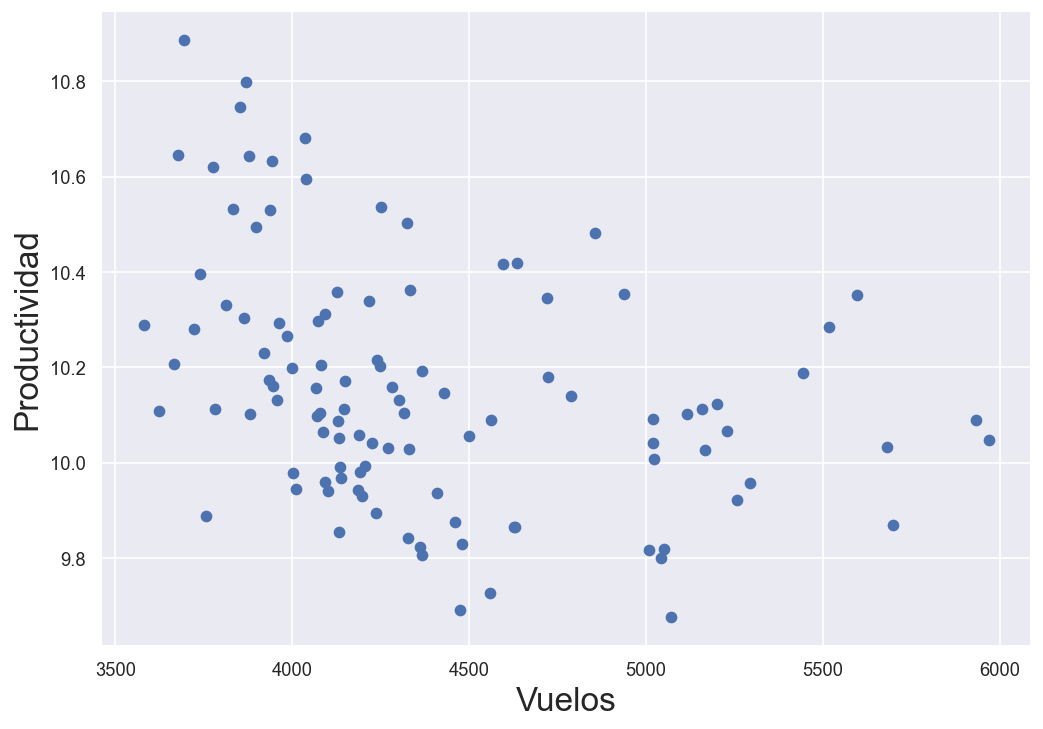

In [53]:
X1=data_1['Vuelos']
y=data_1['Productividad']

plt.scatter(X1,y)
plt.xlabel('Vuelos', fontsize=20)
plt.ylabel('Productividad', fontsize=20)
plt.show()

In [41]:
X=sm.add_constant(X1)
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Productividad   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     14.98
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           0.000188
Time:                        00:39:35   Log-Likelihood:                 3.2678
No. Observations:                 108   AIC:                            -2.536
Df Residuals:                     106   BIC:                             2.829
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8681      0.185     58.651      0.000      10.501      11.236
Vuelos        -0.0002    4.2e-05     -3.870      0.000      -0.000   -7.92e-05
==============================================================================
Omnibus:                        4.629   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.539
Skew:                           0.456   Prob(JB):                        0.103
Kurtosis:                       2.581   Cond. No.                     3.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

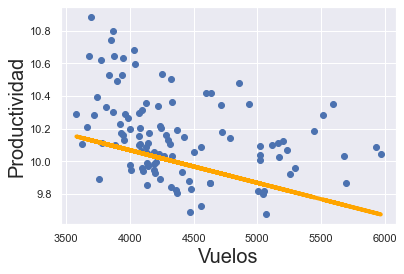

In [11]:
plt.scatter(X1,y)
yhat = -0.0002*X1 + 10.8681
plt.plot(X1,yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('Vuelos', fontsize = 20)
plt.ylabel('Productividad', fontsize = 20)
plt.show()

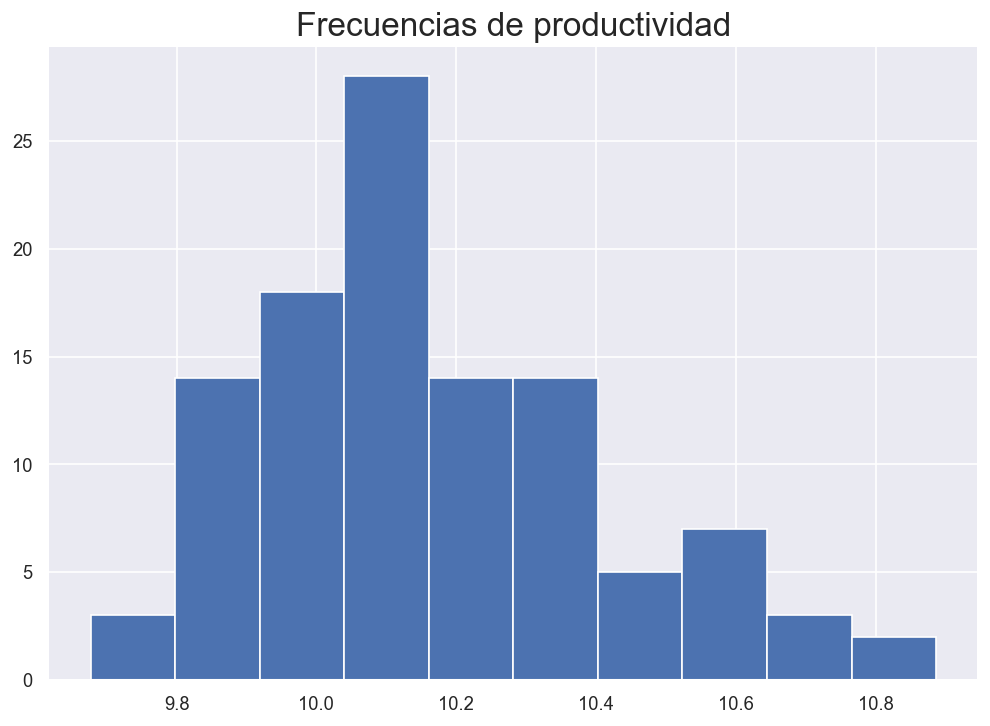

In [57]:
plt.hist(y)
plt.title('Frecuencias de productividad', fontsize=20)
plt.show()

#  Creando el modelo

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X1).reshape(-1,1), y, test_size=0.2, random_state=123)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))

from math import sqrt
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

test_mse = mean_squared_error(y_test, model.predict(X_test))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))




mse =  0.053841033068318084  & mae =  0.18749640440830156  & rmse =  0.2320367062951853
mse =  0.06355895596171358  & mae =  0.2052944749587452  & rmse =  0.25210901602622937


# Realizando predicciones

In [58]:
model.predict(np.array([5600,5700,5800,5900,4000]).reshape(-1,1))

array([10.00281807,  9.98812599,  9.97343392,  9.95874184, 10.23789134])

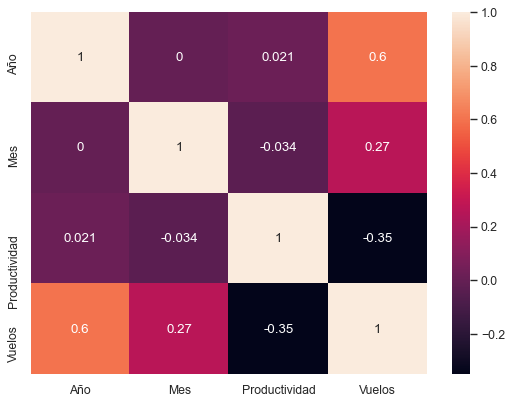

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### 3.Observamos la correlación entre variables

In [13]:
data.corr()

,Año,Mes,Productividad,Vuelos
Año,1.000000,0.000000,0.021424,0.598695
Mes,0.000000,1.000000,-0.033740,0.265813
Productividad,0.021424,-0.033740,1.000000,-0.351840
Vuelos,0.598695,0.265813,-0.351840,1.000000


### 4. Generamos una variable de fecha correctamente formateada

In [14]:
data_forecasting=data[['Año','Mes','Vuelos']]
day=[]
for a in range(108):
    day.append(1)
data_forecasting['day']= day
data_forecasting=pd.DataFrame({'year':data_forecasting['Año'],'month':data_forecasting['Mes'],'day':data_forecasting['day'], 
                               'vuelos':data_forecasting['Vuelos']})
data_forecasting

,year,month,day,vuelos
0,2011,1,1,3870
1,2011,2,1,3721
2,2011,3,1,4481
3,2011,4,1,4408
4,2011,5,1,4501
...,...,...,...,...
103,2019,8,1,5970
104,2019,9,1,5680
105,2019,10,1,5518
106,2019,11,1,5698


In [15]:
fecha=pd.to_datetime(data_forecasting[['year','month','day']])
data_forecasting['fecha']=fecha
data_forecasting

,year,month,day,vuelos,fecha
0,2011,1,1,3870,2011-01-01
1,2011,2,1,3721,2011-02-01
2,2011,3,1,4481,2011-03-01
3,2011,4,1,4408,2011-04-01
4,2011,5,1,4501,2011-05-01
...,...,...,...,...,...
103,2019,8,1,5970,2019-08-01
104,2019,9,1,5680,2019-09-01
105,2019,10,1,5518,2019-10-01
106,2019,11,1,5698,2019-11-01


In [16]:
data_forecasting=data_forecasting[['fecha','vuelos']]
data_forecasting

,fecha,vuelos
0,2011-01-01,3870
1,2011-02-01,3721
2,2011-03-01,4481
3,2011-04-01,4408
4,2011-05-01,4501
...,...,...
103,2019-08-01,5970
104,2019-09-01,5680
105,2019-10-01,5518
106,2019-11-01,5698


### 5. Visualizamos los datos y observamos que tenemos los mismo datos en 2018 y 2019

In [17]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

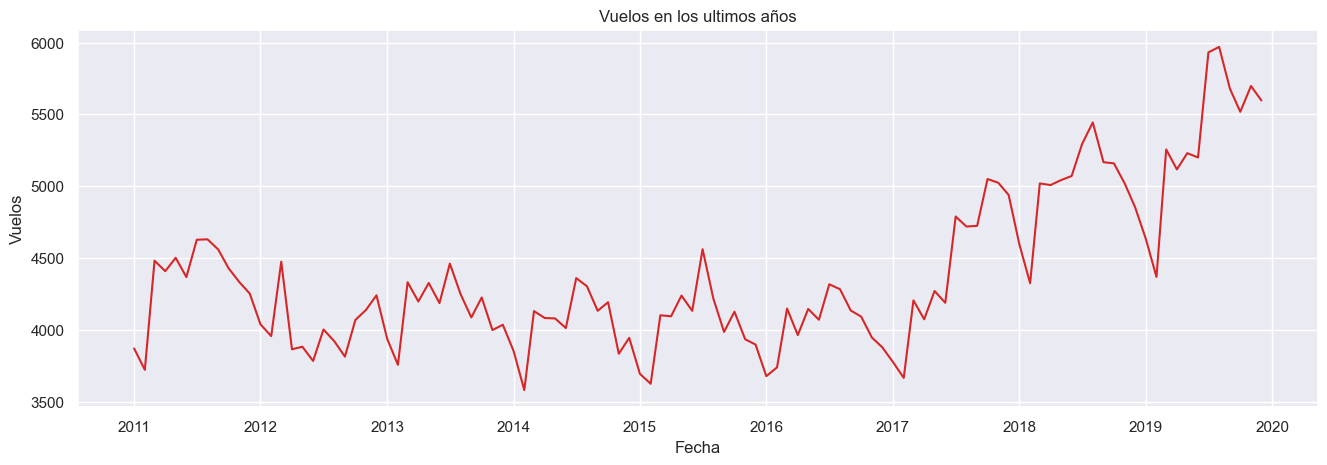

In [18]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Vuelos', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_forecasting, x=data_forecasting.fecha, y=data_forecasting.vuelos, title='Vuelos en los ultimos años')

In [19]:
#borramos 2019 ya que posee los mismos datos que 2018
data_forecasting.drop(data_forecasting.tail(12).index,inplace=True)
data_forecasting.tail(24)

C:\Users\jdani\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,vuelos
72,2017-01-01,3775
73,2017-02-01,3665
74,2017-03-01,4205
75,2017-04-01,4073
76,2017-05-01,4270
77,2017-06-01,4188
78,2017-07-01,4789
79,2017-08-01,4719
80,2017-09-01,4724
81,2017-10-01,5050


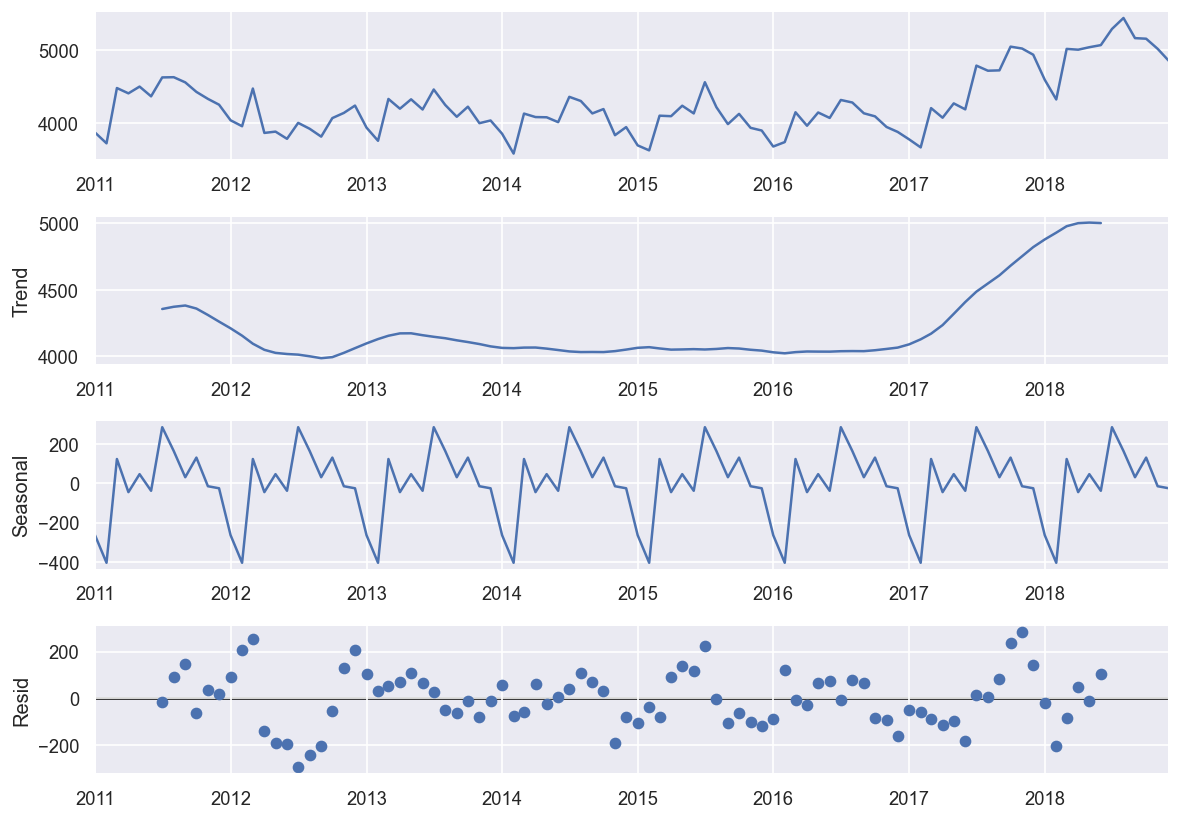

In [20]:
#Establecemos la fecha como el índice y analizamos la tendencia y los comportmientos estacionales
data_forecasting=data_forecasting.set_index('fecha')
decomposition = sm.tsa.seasonal_decompose(data_forecasting, model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
#generamos la red de parámetros como si fuera la validación cruzada
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
len(q)

2

In [23]:
results_acumulated=[]
params_=[]
params_seasonal_=[]
            
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_forecasting,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            results_acumulated.append(results.aic)
            params_.append(param)
            params_seasonal_.append(param_seasonal)
            
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
        
    
        

C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

In [24]:

results_=pd.DataFrame({'results_aic':results_acumulated, 'params':params_, 'param_seasonal':params_seasonal_})
results_.sort_values(by=['results_aic'])

,results_aic,params,param_seasonal
27,872.368637,"(0, 1, 1)","(0, 1, 1, 12)"
59,874.175932,"(1, 1, 1)","(0, 1, 1, 12)"
31,874.337531,"(0, 1, 1)","(1, 1, 1, 12)"
63,875.979151,"(1, 1, 1)","(1, 1, 1, 12)"
19,882.710433,"(0, 1, 0)","(0, 1, 1, 12)"
...,...,...,...
32,1322.173761,"(1, 0, 0)","(0, 0, 0, 12)"
9,1421.109630,"(0, 0, 1)","(0, 0, 1, 12)"
1,1536.498893,"(0, 0, 0)","(0, 0, 1, 12)"
8,1723.148541,"(0, 0, 1)","(0, 0, 0, 12)"


### 6. Elegimos el mejor modelo en la tabla anterior y lo aplicamos

In [25]:
mod = sm.tsa.statespace.SARIMAX(data_forecasting,
                                order=(0, 1, 1),
                                seasonal_order=(0,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0963      0.127     -0.757      0.449      -0.346       0.153
ma.S.L12      -1.0002    171.882     -0.006      0.995    -337.883     335.883
sigma2      1.321e+04   2.27e+06      0.006      0.995   -4.44e+06    4.47e+06


C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jdani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


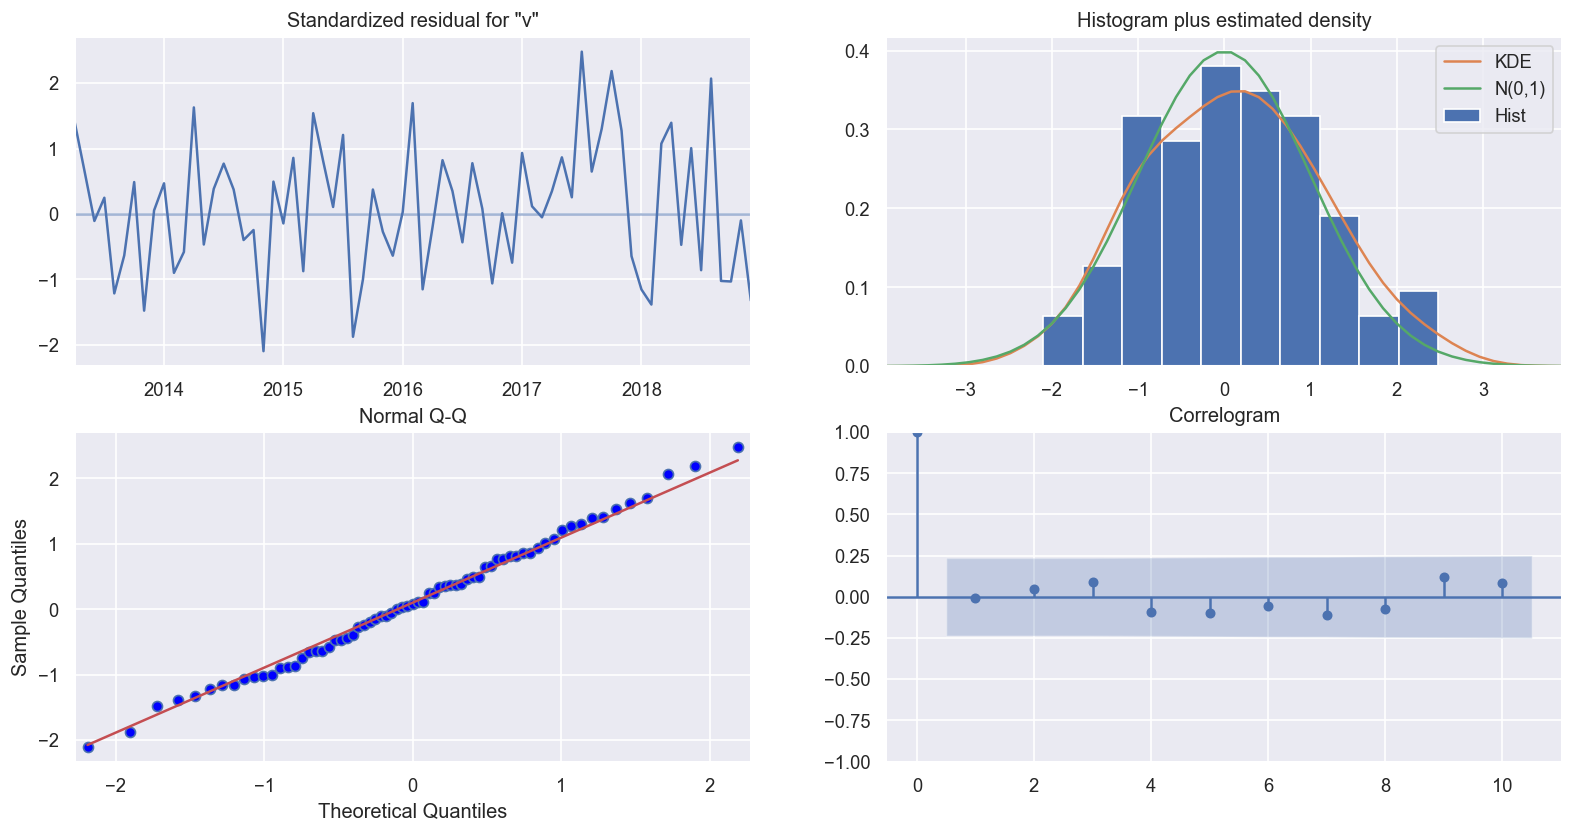

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### 7. Realizamos el forecasting con el modelo SARIMAX y lo comparamos con los datos reales de 2018

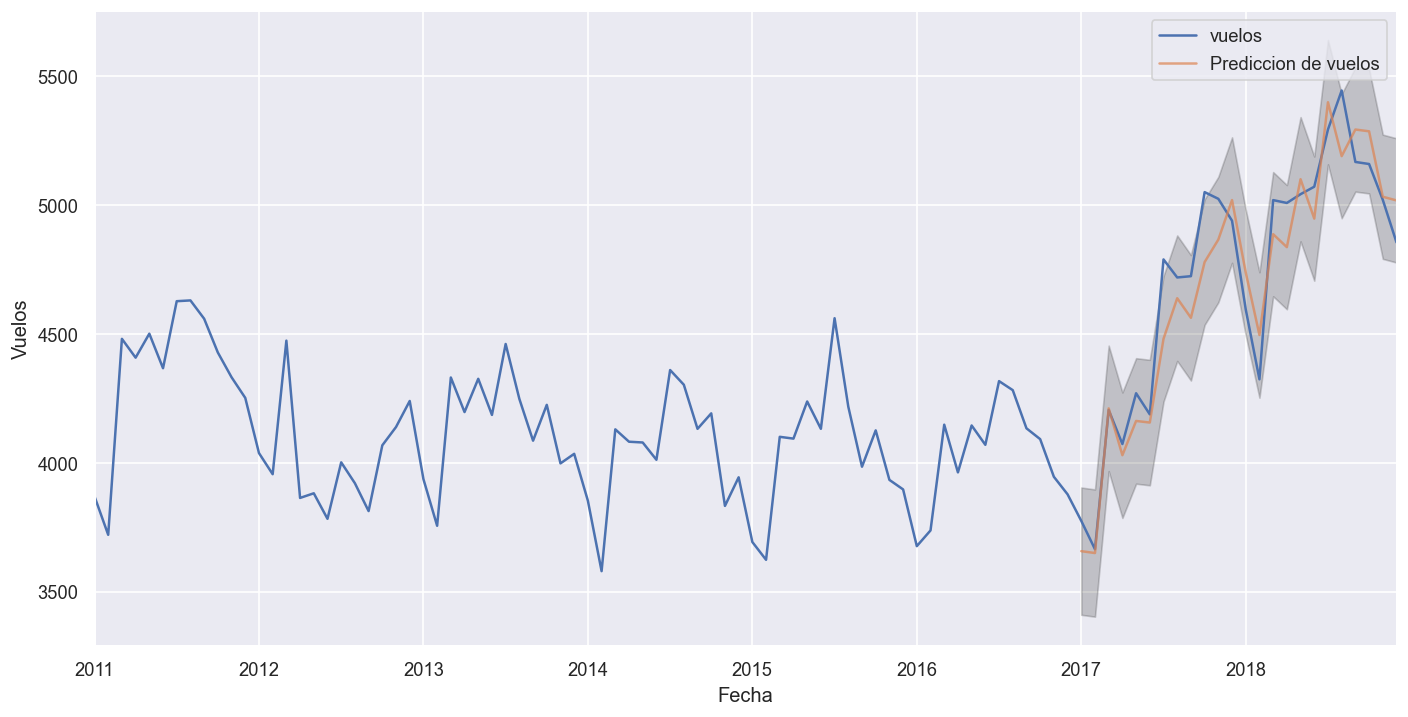

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data_forecasting['2011':].plot(label='Observados')
pred.predicted_mean.plot(ax=ax, label='Prediccion de vuelos', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Vuelos')
plt.legend()
plt.show()